In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wordcloud as wordcloud
from pathlib import Path
from PIL import Image
from os import path

In [42]:
# sciezka = os.path.dirname(os.getcwd())
# sciezka2 = os.path.join(sciezka, "WA_Fn-UseC_-HR-Employee-Attrition.csv")
sciezka2 = os.path.join(os.path.dirname(os.getcwd()), "WA_Fn-UseC_-HR-Employee-Attrition.csv") # pobranie ścieżki do folderu nadrzędnego
# sciezka3 = Path("__file__").parent
# print(sciezka)
# print(sciezka2)
# print(sciezka3)
df = pd.read_csv(sciezka2, encoding="UTF-8") #zaimportowanie pliku z danymi

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


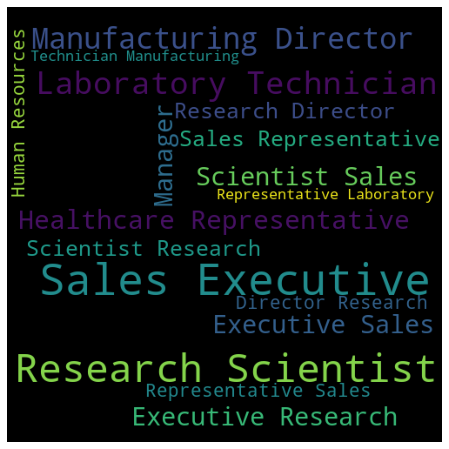

In [39]:
from wordcloud import WordCloud
# import matplotlib.pyplot as plt 

df_ds = df[["JobRole"]] # utworzenie ramki danych z listą stanowisk
list_of_roles = df_ds['JobRole'].to_list()
listToStr = ' '.join([str(elem) for elem in list_of_roles])
# print(list_of_roles)

def plot_cloud(wordcloud):
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(relative_scaling=0.1, width = 500, height = 500, background_color='black', prefer_horizontal=0.6, min_font_size=10, max_font_size=50, font_step=4, random_state=10).generate(listToStr)
plot_cloud(wordcloud)

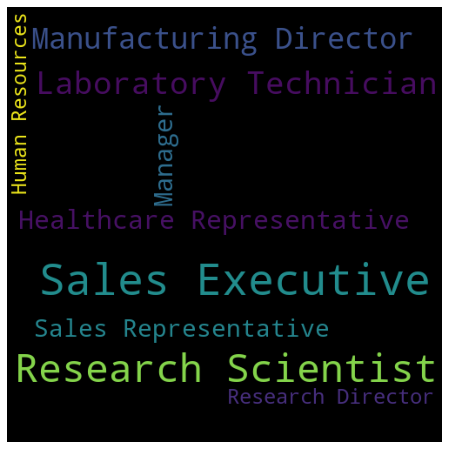

In [40]:
roles_freq = {}
for role in list_of_roles:
    if role in roles_freq:
        roles_freq[role]+=1
    else:
        roles_freq[role]=1
# roles_freq
wordcloud = WordCloud(relative_scaling=0.1, width = 500, height = 500, background_color='black', prefer_horizontal=0.6, min_font_size=10, max_font_size=50, font_step=4, random_state=10).generate_from_frequencies(roles_freq)
plot_cloud(wordcloud)

<Figure size 432x288 with 0 Axes>

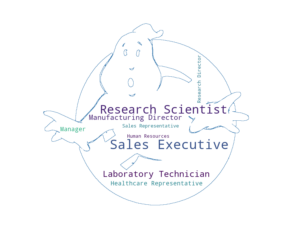

<Figure size 432x288 with 0 Axes>

In [41]:
databusters_mask = np.array(Image.open(path.join("ghostbusters-mask.png")))

wc = WordCloud(background_color="white", relative_scaling=0.1, prefer_horizontal=0.6, min_font_size=15, max_font_size=50, font_step=4, random_state=20, max_words=20, mask=databusters_mask, contour_width=1, contour_color='steelblue')

# generate word cloud
wc.generate_from_frequencies(roles_freq)

# store to file
wc.to_file(path.join("databuster_roles.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
# plt.imshow(databusters_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()